## Intialize R

In [ ]:
%load_ext rpy2.ipython

##Installing Packages

In [ ]:
%%R
# Installing the packages
install.packages("factoextra")
install.packages("NbClust")
install.packages("cluster")
install.packages("readr")
install.packages("dplyr")
install.packages("Rtsne")
install.packages("fpc")
install.packages("dbscan")
install.packages("dendextend")
install.packages("ggplot2")
install.packages("caret")
install.packages("mlbench")
install.packages("lattice")
install.packages("kernlab")

# Load the packages
library(ggplot2)
library(Rtsne)
library(readr)
library(dplyr)
library(cluster)
library(factoextra)
library(NbClust)
library(fpc)
library(dbscan)
library(dendextend)
library(caret)
library(mlbench)
library(lattice)
library(kernlab)

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz5Cz06/

## Data Pre-processing

In [ ]:
%%R

# Data Loading
dl<- read_csv("/content/clean_game.csv")
data <- select(dl,"GAD_T", "Narcissism", "SPIN_T", "Hours", "SWL_T", "whyplay_clean", "Work", "Playstyle_clean")

# character columns to factors
data[which(sapply(data, is.character))] <- lapply(data[which(sapply(data, is.character))], factor)

Rows: 10591 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): Birthplace, Degree, GADT_Cat, Game, Gender, League_clean, Narcissi...
dbl  (6): Age, GAD_T, Hours, Narcissism, SPIN_T, SWL_T

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## PAM Clustering

In [ ]:
%%R
# Gower distance calcualtion

gower_dist <- daisy(data,
                    metric = "gower")
summary(gower_dist)


56079345 dissimilarities, summarized :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3036  0.3861  0.3850  0.4761  0.9133 
Metric :  mixed ;  Types = I, I, I, I, I, N, N, N 
Number of objects : 10591


In [ ]:
%%R
gower_mat <- as.matrix(gower_dist)
# Output most similar pair
data[
  which(gower_mat == min(gower_mat[gower_mat != min(gower_mat)]),
        arr.ind = TRUE)[1, ], ]


# A tibble: 2 × 8
  GAD_T Narcissism SPIN_T Hours SWL_T whyplay_clean Work         Playstyle_clean
  <dbl>      <dbl>  <dbl> <dbl> <dbl> <fct>         <fct>        <fct>          
1     1          2     19    22    24 fun           Student at … Multiplayer - …
2     1          2     19    21    24 fun           Student at … Multiplayer - …


In [ ]:
%%R
# Output most dissimilar pair
data[
  which(gower_mat == max(gower_mat[gower_mat != max(gower_mat)]),
        arr.ind = TRUE)[1, ], ]

# A tibble: 2 × 8
  GAD_T Narcissism SPIN_T Hours SWL_T whyplay_clean Work         Playstyle_clean
  <dbl>      <dbl>  <dbl> <dbl> <dbl> <fct>         <fct>        <fct>          
1    21          5     68    40     5 winning       Student at … Multiplayer - …
2     3          1      0    84    35 improving     Employed     Multiplayer - …


### Optimal no. of Clusters

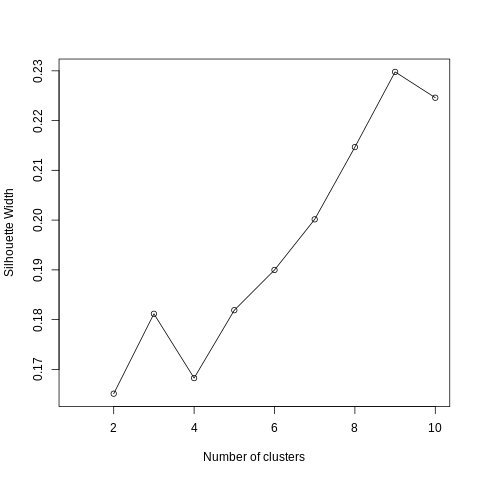

In [ ]:
%%R

# Calculate silhouette width for many k using PAM
sil_width <- c(NA)
for(i in 2:10){

  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)

  sil_width[i] <- pam_fit$silinfo$avg.width

}
# Plot silhouette width (higher is better)
plot(1:10, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_width)

### Structural Plot

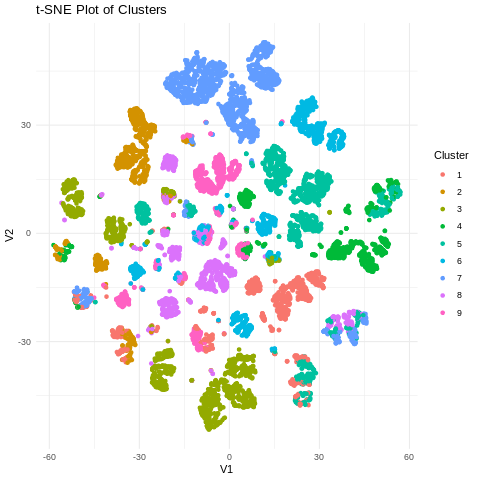

In [ ]:
%%R
pam_result <- pam(gower_dist, diss = TRUE, k = 9)

# 2-D Plotting for PAM Clustering results
tsne_result <- Rtsne(gower_dist, is_distance = TRUE)
tsne_data <- as.data.frame(tsne_result$Y)
tsne_data$cluster <- pam_result$cluster

ggplot(tsne_data, aes(x = V1, y = V2, color = as.factor(cluster))) +
  geom_point() +
  theme_minimal() +
  labs(title = "t-SNE Plot of Clusters",
       color = "Cluster")

### Elements per cluster

In [ ]:
%%R
table(pam_result$clustering)


   1    2    3    4    5    6    7    8    9 
1085  851 1501  888 1554 1093 1679 1084  856 


### Cluster Interpretation

In [ ]:
%%R
pam_fit <- pam(gower_dist, diss = TRUE, k = 9)
pam_results <- data %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))
pam_results$the_summary

[[1]]
     GAD_T          Narcissism        SPIN_T          Hours       
 Min.   : 0.000   Min.   :1.000   Min.   : 0.00   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.: 5.00   1st Qu.: 10.00  
 Median : 2.000   Median :2.000   Median :10.00   Median : 15.00  
 Mean   : 3.197   Mean   :1.988   Mean   :13.24   Mean   : 18.17  
 3rd Qu.: 4.000   3rd Qu.:3.000   3rd Qu.:18.00   3rd Qu.: 24.00  
 Max.   :21.000   Max.   :5.000   Max.   :62.00   Max.   :100.00  
     SWL_T           whyplay_clean                              Work     
 Min.   : 5.00   all        : 13   Employed                       :1039  
 1st Qu.:18.00   distraction:  0   Student at college / university:   0  
 Median :24.00   fun        :724   Student at school              :   0  
 Mean   :22.73   improving  :156   Unemployed / between jobs      :  46  
 3rd Qu.:28.00   relaxing   : 53                                         
 Max.   :35.00   winning    :139                                         
       

## Hierarchical Clustering

### Optimal number of clusters

In [ ]:
%%R
sil_widths <- c()  # To store average silhouette widths for each number of clusters

hc1 <- hclust (gower_dist, method="complete")

for (k in 2:10) {
  # Cut the dendrogram to get 'k' clusters
  cluster_assignments <- cutree(hc1, k)

  # Calculate silhouette width for these cluster assignments
  sil_width <- silhouette(cluster_assignments, gower_dist)
  avg_sil_width <- mean(sil_width[, "sil_width"])

  # Store the average silhouette width
  sil_widths[k] <- avg_sil_width

}

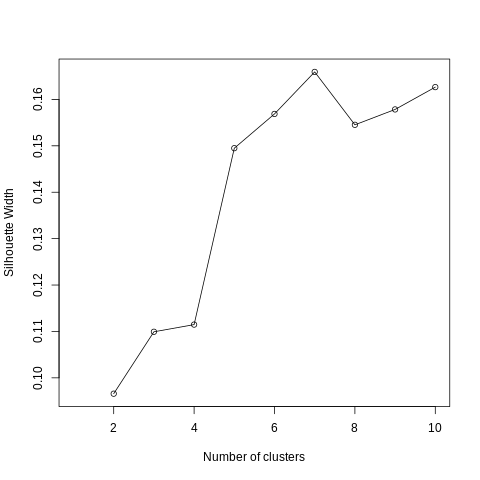

In [ ]:
%%R
plot(1:10, sil_widths,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_widths)

### Elements per cluster

In [ ]:
%%R
cluster_assignments <- cutree(hc1, k = 7)

table(cluster_assignments)

cluster_assignments
   1    2    3    4    5    6    7 
2118 2950  874 2719 1121  474  335 


### Structural Plot

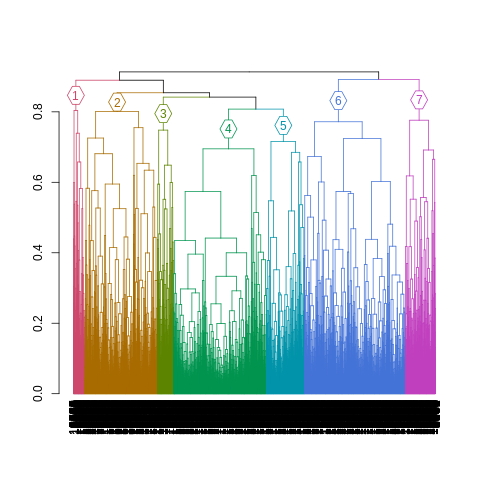

In [ ]:
%%R
# Plot the dendrogram with 7 clusters, using dendextend for custom colors
dend <- as.dendrogram(hc1)
dend <- color_branches(dend, k = 7, groupLabels = TRUE)

# Plot the dendrogram
plot(dend)

### Cluster Interpretation

In [ ]:
%%R
hc_results <- data %>%
  mutate(cluster = cluster_assignments) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))
hc_results$the_summary


[[1]]
     GAD_T          Narcissism        SPIN_T          Hours       
 Min.   : 0.000   Min.   :1.000   Min.   : 0.00   Min.   :  0.00  
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.: 7.00   1st Qu.: 10.00  
 Median : 3.000   Median :2.000   Median :14.00   Median : 20.00  
 Mean   : 4.328   Mean   :2.005   Mean   :16.77   Mean   : 19.66  
 3rd Qu.: 6.000   3rd Qu.:3.000   3rd Qu.:23.00   3rd Qu.: 25.00  
 Max.   :21.000   Max.   :5.000   Max.   :64.00   Max.   :120.00  
     SWL_T           whyplay_clean                              Work     
 Min.   : 5.00   all        : 24   Employed                       :1941  
 1st Qu.:15.00   distraction:  1   Student at college / university: 128  
 Median :21.00   fun        :864   Student at school              :  46  
 Mean   :21.05   improving  :742   Unemployed / between jobs      :   3  
 3rd Qu.:27.00   relaxing   :182                                         
 Max.   :35.00   winning    :305                                         
       

## DBSCAN Clustering

### Optimal no. of clusters

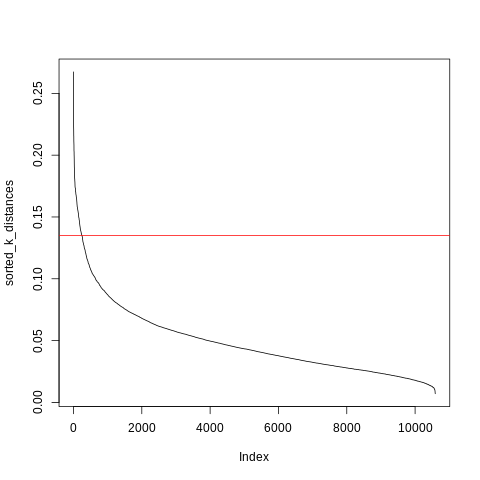

In [ ]:
%%R
set.seed(123)

#Calculating k-Nearest Neighbors (kNN) Distances
k_distances <- kNNdist(gower_dist, k=5)

# Sort the distances in descending order
sorted_k_distances <- sort(k_distances, decreasing = TRUE)# Plot the k-distances

plot(sorted_k_distances, type = 'l')

# The elbow start seems to be at 0.135 from the graph
abline(h=0.135, col="red")


### Elements per cluster

In [ ]:
%%R

db <- dbscan(gower_dist, eps=0.135, minPts=5)

table(db$cluster)


    0     1     2     3     4     5     6     7     8 
  116 10386    15    17    13    14     8     9    13 


### Structural plot

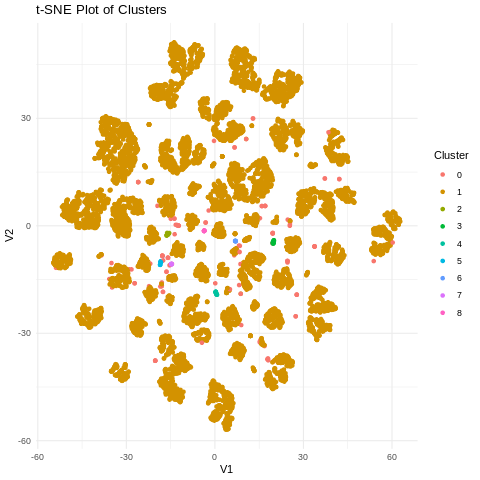

In [ ]:
%%R
tsne_result <- Rtsne(gower_dist, is_distance = TRUE)
tsne_data <- as.data.frame(tsne_result$Y)
tsne_data$cluster <- db$cluster

ggplot(tsne_data, aes(x = V1, y = V2, color = as.factor(cluster))) +
  geom_point() +
  theme_minimal() +
  labs(title = "t-SNE Plot of Clusters",
       color = "Cluster")

### Interpretation of results

In [ ]:
%%R

dbscan_results <- data %>%
  mutate(cluster = db$cluster) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))
dbscan_results$the_summary


[[1]]
     GAD_T          Narcissism        SPIN_T          Hours       
 Min.   : 0.000   Min.   :1.000   Min.   : 0.00   Min.   :  2.00  
 1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 9.00   1st Qu.: 15.75  
 Median : 7.000   Median :2.000   Median :21.00   Median : 25.00  
 Mean   : 8.776   Mean   :2.319   Mean   :24.57   Mean   : 30.28  
 3rd Qu.:14.000   3rd Qu.:3.000   3rd Qu.:36.25   3rd Qu.: 40.00  
 Max.   :21.000   Max.   :5.000   Max.   :68.00   Max.   :120.00  
     SWL_T           whyplay_clean                              Work   
 Min.   : 5.00   all        :21    Employed                       :25  
 1st Qu.:10.00   distraction:26    Student at college / university:22  
 Median :17.00   fun        :12    Student at school              :26  
 Mean   :16.82   improving  :15    Unemployed / between jobs      :43  
 3rd Qu.:21.25   relaxing   :27                                        
 Max.   :35.00   winning    :15                                        
                     

## SFS with Linear Regression (Wrapping)

In [ ]:
%%R

dataforSFS <- dl[c("GAD_T", "Hours", "SPIN_T", "SWL_T", 'League_clean', 'Narcissism_Cat', 'Playstyle_clean' , 'Work' , 'earnings_clean', 'whyplay_clean' )]

attach(dataforSFS)

# Step 1: Define base intercept only model (no variables)
base.mod <- lm(GAD_T ~ 1 , data=dataforSFS)
# Step 2: Full model with all predictors
all.mod <- lm(GAD_T ~ . , data= dataforSFS)
# Step 3: Perform step-wise algorithm . direction=both, forward, backward,
stepMod <- step(base.mod, scope = list(lower = base.mod, upper = all.mod), direction = "forward", trace = 0, steps = 1000)

# Step 4: Get the shortlisted variable.
shortlistedVars <- names(unlist(stepMod[[1]]))

# Show
print(shortlistedVars)
#Model
summary(stepMod)



    earnings_clean, GAD_T, Hours, League_clean, Narcissism_Cat,
    Playstyle_clean, SPIN_T, SWL_T, whyplay_clean, Work




 [1] "(Intercept)"                         "SPIN_T"                             
 [3] "SWL_T"                               "whyplay_cleandistraction"           
 [5] "whyplay_cleanfun"                    "whyplay_cleanimproving"             
 [7] "whyplay_cleanrelaxing"               "whyplay_cleanwinning"               
 [9] "Narcissism_CatMostly True of me"     "Narcissism_CatNot Very True of me"  
[11] "Narcissism_CatSomewhat True of me"   "Narcissism_CatVery True of me"      
[13] "League_cleandiamond"                 "League_cleangold"                   
[15] "League_cleanmaster"                  "League_cleanplatinum"               
[17] "League_cleansilver"                  "League_cleanunranked"               
[19] "earnings_cleanFun"                   "earnings_cleanHoping to earn"       
[21] "WorkStudent at college / university" "WorkStudent at school"              
[23] "WorkUnemployed / between jobs"       "Hours"                              

Call:
lm(formula = GAD_T ~ 

## SVM

In [18]:
%%R

#Data Pre-processing
dataForSVM <- dl[c("GAD_T", "Hours", "SPIN_T", "SWL_T", "whyplay_clean", "Work", "Playstyle_clean", "Narcissism")]
summary(dataForSVM)

#Categorizing the Data
dataForSVM$GAD_T <- as.factor(dataForSVM$GAD_T)

#Converting the data into string
str(dataForSVM)

#Splitting the dataset into Test and Train (80, 20)
total_rows <- nrow(dataForSVM)
train_rows <- round(total_rows * 0.80)

# Splitting the dataset
dataForSVM_train <- dataForSVM[1:train_rows, ]
dataForSVM_test <- dataForSVM[(train_rows + 1):total_rows,]

#train & test summaries
summary(dataForSVM_train)
summary(dataForSVM_test)

#count of train & test values
nrow(dataForSVM_train)
nrow(dataForSVM_test)


# Function to perform SVM and evaluate
perform_svm <- function(kernel_type, dataForSVM_train, dataForSVM_test) {
  # Train the SVM model
  svm_model <- ksvm(GAD_T ~ ., data = dataForSVM_train, kernel = kernel_type)

  # Make predictions
  predictions <- predict(svm_model, dataForSVM_test)

  # Confusion Matrix and class-wise metrics
  confusionMatrix <- table(predictions, dataForSVM_test$GAD_T)
  metrics <- confusionMatrix(predictions, dataForSVM_test$GAD_T)

  # Return results
  list(model = svm_model,
       confusionMatrix = confusionMatrix,
       metrics = metrics)
}


# Apply SVM with Gaussian RBF (rbfdot) kernel
rbf_results <- perform_svm("rbfdot", dataForSVM_train, dataForSVM_test)

# Display results for Gaussian RBF (rbfdot) kernel
print(rbf_results$model)
print(rbf_results$confusionMatrix)
print(rbf_results$metrics)

#Overall Accuracy Gaussian RBF (rbfdot) percentage
rbf_accuracy <- sum(diag(rbf_results$confusionMatrix)) / sum(rbf_results$confusionMatrix)
rbf_accuracy_percentage <- rbf_accuracy * 100
rbf_accuracy_percentage

# Apply SVM with Polynomial (polydot) kernel
poly_results <- perform_svm("polydot", dataForSVM_train, dataForSVM_test)

# Display results for Polynomial (polydot) kernel
print(poly_results$model)
print(poly_results$confusionMatrix)
print(poly_results$metrics)

#Overall Accuracy Polynomial (polydot) percentage
poly_accuracy <- sum(diag(poly_results$confusionMatrix)) / sum(poly_results$confusionMatrix)
poly_accuracy_percentage <- poly_accuracy * 100
poly_accuracy_percentage


# Apply SVM with Euclidean inner product (vanilladot) kernel
van_results <- perform_svm("vanilladot", dataForSVM_train, dataForSVM_test)

# Display results for Euclidean inner product (vanilladot) kernel
print(van_results$model)
print(van_results$confusionMatrix)
print(van_results$metrics)

#Overall Accuracy Euclidean inner product (vanilladot) percentage
van_accuracy <- sum(diag(van_results$confusionMatrix)) / sum(van_results$confusionMatrix)
van_accuracy_percentage <- van_accuracy * 100
van_accuracy_percentage

# Apply SVM with Hyperbolic tangent (tanhdot) kernel
tan_results <- perform_svm("tanhdot", dataForSVM_train, dataForSVM_test)

# Display results for  Hyperbolic tangent kernel (tanhdot) kernel
print(tan_results$model)
print(tan_results$confusionMatrix)
print(tan_results$metrics)

#Overall Accuracy percentage for Hyperbolic tangent (tanhdot) kernel
tan_accuracy <- sum(diag(tan_results$confusionMatrix)) / sum(tan_results$confusionMatrix)
tan_accuracy_percentage <- tan_accuracy * 100
tan_accuracy_percentage



tibble [10,591 × 8] (S3: tbl_df/tbl/data.frame)
 $ GAD_T          : Factor w/ 22 levels "0","1","2","3",..: 1 6 1 2 12 2 20 9 22 19 ...
 $ Hours          : num [1:10591] 25 5 9 7 25 10 25 20 40 10 ...
 $ SPIN_T         : num [1:10591] 3 31 39 29 17 11 47 25 45 30 ...
 $ SWL_T          : num [1:10591] 33 26 26 21 10 13 29 17 12 15 ...
 $ whyplay_clean  : chr [1:10591] "fun" "fun" "improving" "fun" ...
 $ Work           : chr [1:10591] "Employed" "Employed" "Employed" "Student at college / university" ...
 $ Playstyle_clean: chr [1:10591] "Multiplayer - online - with real life friends" "Multiplayer - online - with strangers" "Multiplayer - online - with real life friends" "Multiplayer - online - with strangers" ...
 $ Narcissism     : num [1:10591] 1 3 4 2 3 3 5 2 4 1 ...
Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.127495307085145 

Number of Support Vector